In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [3]:
X1  = pd.read_csv('dump1.position',header=None)
X2  = pd.read_csv('dump2.position',header=None)
X3  = pd.read_csv('dump3.position',header=None)
X4  = pd.read_csv('dump4.position',header=None)
X5  = pd.read_csv('dump5.position',header=None)

In [4]:
X1.head(30)

,0
0,ITEM: TIMESTEP
1,0
2,ITEM: NUMBER OF ATOMS
3,15
4,ITEM: BOX BOUNDS ff fm pp
5,-4.1000000000000000e+01 4.1000000000000000e+01
6,0.0000000000000000e+00 2.0000000000000000e+02
7,-2.5000000000000000e-01 2.5000000000000000e-01
8,ITEM: ATOMS id type x y
9,42464 2 -0.5 140.866


In [5]:
atom_id,_,x,y = map(float,X1.iloc[9][0].strip().split())

In [6]:
atom_id,x,y

(42464.0, -0.5, 140.866)

In [7]:
X1.shape[0]

2016

In [8]:
# Creating df
df1 = {}
df2 = {}
df3 = {}
df4 = {}
df5 = {}
for i in range(42463,42538,1):
    if 42463<=i<42463+15:
        df1[i] = {}
    elif 42463+15<=i<42463+30:
        df2[i] = {}
    elif 42463+30<=i<42463+45:
        df3[i] = {}
    elif 42463+45<=i<42463+60:
        df4[i] = {}
    elif 42463+60<=i<42463+75:
        df5[i] = {}
    
for i in range(0,X1.shape[0],24):
    time = int(X1.iloc[i+1][0])*(5*10**-6)
    for j in range(i+9,i+24):
        sphere_id,_,x,y = map(float, X1.iloc[j][0].strip().split())
        df1[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X2.iloc[j][0].strip().split())
        df2[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X3.iloc[j][0].strip().split())
        df3[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X4.iloc[j][0].strip().split())
        df4[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X5.iloc[j][0].strip().split())
        df5[int(sphere_id)][time] = [x,y]
        
data1 = pd.DataFrame(df1)
data1.index.name = 'Time'

data2 = pd.DataFrame(df2)
data2.index.name = 'Time'

data3 = pd.DataFrame(df3)
data3.index.name = 'Time'

data4 = pd.DataFrame(df4)
data4.index.name = 'Time'

data5 = pd.DataFrame(df5)
data5.index.name = 'Time'

In [9]:
data4

,42508,42509,42510,42511,42512,42513,42514,42515,42516,42517,42518,42519,42520,42521,42522
Time,,,,,,,,,,,,,,,
0.00,"[0.0, 153.383]","[-0.5, 154.249]","[0.5, 154.249]","[-1.0, 155.115]","[0.0, 155.115]","[1.0, 155.115]","[-1.5, 155.981]","[-0.5, 155.981]","[0.5, 155.981]","[1.5, 155.981]","[-2.0, 156.847]","[-1.0, 156.847]","[0.0, 156.847]","[1.0, 156.847]","[2.0, 156.847]"
0.05,"[-1.73672e-17, 153.263]","[-0.5, 154.129]","[0.5, 154.129]","[-1.0, 154.995]","[-1.64697e-17, 154.995]","[1.0, 154.995]","[-1.5, 155.861]","[-0.5, 155.861]","[0.5, 155.861]","[1.5, 155.861]","[-2.0, 156.727]","[-1.0, 156.727]","[-1.55722e-17, 156.727]","[1.0, 156.727]","[2.0, 156.727]"
0.10,"[-7.12671e-17, 152.896]","[-0.5, 153.762]","[0.5, 153.762]","[-1.0, 154.628]","[-6.54137e-17, 154.628]","[1.0, 154.628]","[-1.5, 155.494]","[-0.5, 155.494]","[0.5, 155.494]","[1.5, 155.494]","[-2.0, 156.36]","[-1.0, 156.36]","[-5.95602e-17, 156.36]","[1.0, 156.36]","[2.0, 156.36]"
0.15,"[-1.84942e-16, 152.279]","[-0.5, 153.145]","[0.5, 153.145]","[-1.0, 154.011]","[-1.52264e-16, 154.011]","[1.0, 154.011]","[-1.5, 154.877]","[-0.5, 154.877]","[0.5, 154.877]","[1.5, 154.877]","[-2.0, 155.743]","[-1.0, 155.743]","[-1.19586e-16, 155.743]","[1.0, 155.743]","[2.0, 155.743]"
0.20,"[-3.30667e-16, 151.412]","[-0.5, 152.278]","[0.5, 152.278]","[-1.0, 153.144]","[-2.7009e-16, 153.144]","[1.0, 153.144]","[-1.5, 154.01]","[-0.5, 154.01]","[0.5, 154.01]","[1.5, 154.01]","[-2.0, 154.876]","[-1.0, 154.876]","[-2.09513e-16, 154.876]","[1.0, 154.876]","[2.0, 154.876]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.95,"[-8.34943, 7.20936]","[-8.0203, 8.15362]","[-7.3671, 7.39643]","[-7.69116, 9.09788]","[-7.03797, 8.34069]","[-6.38478, 7.5835]","[-7.36203, 10.0421]","[-6.70884, 9.28495]","[-6.05565, 8.52776]","[-5.40245, 7.77057]","[-7.03289, 10.9864]","[-6.3797, 10.2292]","[-5.72651, 9.47202]","[-5.07332, 8.71483]","[-4.42013, 7.95763]"
4.00,"[-8.34699, 7.21037]","[-8.01781, 8.15461]","[-7.36465, 7.39739]","[-7.68864, 9.09886]","[-7.03548, 8.34164]","[-6.38232, 7.58442]","[-7.35947, 10.0431]","[-6.70631, 9.28589]","[-6.05315, 8.52866]","[-5.39999, 7.77144]","[-7.03029, 10.9874]","[-6.37713, 10.2301]","[-5.72397, 9.47291]","[-5.07082, 8.71569]","[-4.41766, 7.95847]"
4.05,"[-8.3499, 7.21057]","[-8.02084, 8.15486]","[-7.36759, 7.39772]","[-7.69179, 9.09914]","[-7.03853, 8.342]","[-6.38528, 7.58486]","[-7.36273, 10.0434]","[-6.70948, 9.28629]","[-6.05622, 8.52915]","[-5.40297, 7.77201]","[-7.03367, 10.9877]","[-6.38042, 10.2306]","[-5.72717, 9.47344]","[-5.07392, 8.7163]","[-4.42066, 7.95916]"


In [10]:
time_Arr = []
x_Arr1 = []
y_Arr1 = []

x_Arr2 = []
y_Arr2 = []

x_Arr3 = []
y_Arr3 = []

x_Arr4 = []
y_Arr4 = []

x_Arr5 = []
y_Arr5 = []
for i in data1.index:
    instance1  = data1.loc[i]
    instance2  = data2.loc[i]
    instance3  = data3.loc[i]
    instance4  = data4.loc[i]
    instance5  = data5.loc[i]
    time_Arr.append(i)
    
    center_x = (instance1[42463][0]+instance1[42473][0]+instance1[42477][0])/3
    x_Arr1.append(center_x)
    center_y = (instance1[42463][1]+instance1[42473][1]+instance1[42477][1])/3
    y_Arr1.append(center_y)
    
    center_x = (instance2[42463+15][0]+instance2[42473+15][0]+instance2[42477+15][0])/3
    x_Arr2.append(center_x)
    center_y = (instance2[42463+15][1]+instance2[42473+15][1]+instance2[42477+15][1])/3
    y_Arr2.append(center_y)
    
    center_x = (instance3[42463+30][0]+instance3[42473+30][0]+instance3[42477+30][0])/3
    x_Arr3.append(center_x)
    center_y = (instance3[42463+30][1]+instance3[42473+30][1]+instance3[42477+30][1])/3
    y_Arr3.append(center_y)
    
    center_x = (instance4[42463+45][0]+instance4[42473+45][0]+instance4[42477+45][0])/3
    x_Arr4.append(center_x)
    center_y = (instance4[42463+45][1]+instance4[42473+45][1]+instance4[42477+45][1])/3
    y_Arr4.append(center_y)
    
    center_x = (instance5[42463+60][0]+instance5[42473+60][0]+instance5[42477+60][0])/3
    x_Arr5.append(center_x)
    center_y = (instance5[42463+60][1]+instance5[42473+60][1]+instance5[42477+60][1])/3
    y_Arr5.append(center_y)


centroid_df1 =pd.DataFrame({"time":time_Arr,"x":x_Arr1,"y":y_Arr1})
centroid_df2 =pd.DataFrame({"time":time_Arr,"x":x_Arr2,"y":y_Arr2})
centroid_df3 =pd.DataFrame({"time":time_Arr,"x":x_Arr3,"y":y_Arr3})
centroid_df4 =pd.DataFrame({"time":time_Arr,"x":x_Arr4,"y":y_Arr4})
centroid_df5 =pd.DataFrame({"time":time_Arr,"x":x_Arr5,"y":y_Arr5})

In [11]:
centroid_df5

,time,x,y
0,0.00,0.000000e+00,160.153333
1,0.05,0.000000e+00,160.037333
2,0.10,0.000000e+00,159.674333
3,0.15,0.000000e+00,159.060333
4,0.20,-1.480297e-16,158.196333
...,...,...,...
79,3.95,-4.469877e-01,9.818867
80,4.00,-4.442883e-01,9.819227
81,4.05,-4.473180e-01,9.820673
82,4.10,-4.460157e-01,9.819153


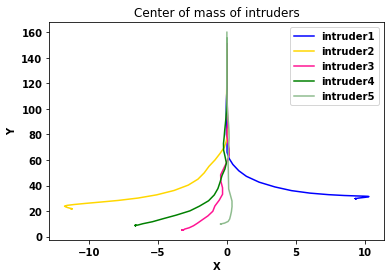

In [12]:
# y Vs x
# plt.figure(figsize=(10,5),dpi=400)
plt.plot(x_Arr1,y_Arr1,label='intruder1',color='blue')
plt.plot(x_Arr2,y_Arr2,label='intruder2',color='gold')
plt.plot(x_Arr3,y_Arr3,label='intruder3',color='deeppink')
plt.plot(x_Arr4,y_Arr4,label='intruder4',color='green')
plt.plot(x_Arr5,y_Arr5,label='intruder5',color='darkseagreen')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.title('Center of mass of intruders')
plt.savefig('intruder y Vs x.svg',bbox_inches='tight')
plt.show()

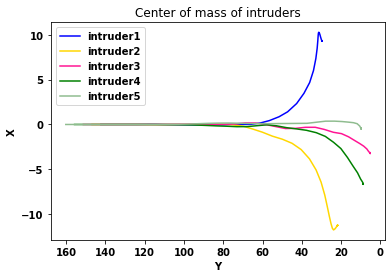

In [13]:
# x Vs y
# plt.figure(figsize=(10,5),dpi=400)
plt.gca().invert_xaxis()
plt.plot(y_Arr1,x_Arr1,label='intruder1',color='blue')
plt.plot(y_Arr2,x_Arr2,label='intruder2',color='gold')
plt.plot(y_Arr3,x_Arr3,label='intruder3',color='deeppink')
plt.plot(y_Arr4,x_Arr4,label='intruder4',color='green')
plt.plot(y_Arr5,x_Arr5,label='intruder5',color='darkseagreen')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.title('Center of mass of intruders')
plt.savefig('intruder x Vs y.svg',bbox_inches='tight')
plt.show()

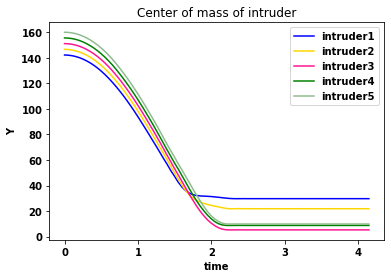

In [14]:
# y Vs time
# plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_Arr,y_Arr1,label='intruder1',color='blue')
plt.plot(time_Arr,y_Arr2,label='intruder2',color='gold')
plt.plot(time_Arr,y_Arr3,label='intruder3',color='deeppink')
plt.plot(time_Arr,y_Arr4,label='intruder4',color='green')
plt.plot(time_Arr,y_Arr5,label='intruder5',color='darkseagreen')
plt.xlabel('time')
plt.ylabel('Y')
plt.legend()
plt.title('Center of mass of intruder')
plt.savefig('intruder y Vs time.svg',bbox_inches='tight')
plt.show()

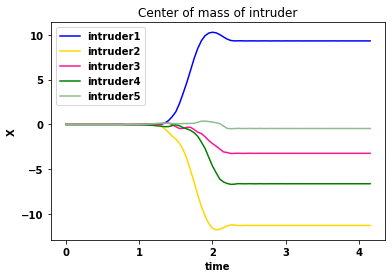

In [15]:
# x Vs time
# plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_Arr,x_Arr1,label='intruder1',color='blue')
plt.plot(time_Arr,x_Arr2,label='intruder2',color='gold')
plt.plot(time_Arr,x_Arr3,label='intruder3',color='deeppink')
plt.plot(time_Arr,x_Arr4,label='intruder4',color='green')
plt.plot(time_Arr,x_Arr5,label='intruder5',color='darkseagreen')
plt.xlabel('time')
plt.ylabel('X')
plt.legend()
plt.title('Center of mass of intruder')
plt.savefig('intruder x Vs time.svg',bbox_inches='tight')
plt.show()

## For Orientataion

In [16]:
orientation1 = []
orientation2 = []
orientation3 = []
orientation4 = []
orientation5 = []
for i in data1.index:
    instance1  = data1.loc[i]
    instance2  = data2.loc[i]
    instance3  = data3.loc[i]
    instance4  = data4.loc[i]
    instance5  = data5.loc[i]
    dely = (instance1[42477][1]-instance1[42473][1])
    delx = (instance1[42477][0]-instance1[42473][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation1.append(theta)
    
    dely = (instance2[42492][1]-instance2[42488][1])
    delx = (instance2[42492][0]-instance2[42488][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation2.append(theta)
    
    dely = (instance3[42507][1]-instance3[42503][1])
    delx = (instance3[42507][0]-instance3[42503][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation3.append(theta)
    
    dely = (instance4[42522][1]-instance4[42518][1])
    delx = (instance4[42522][0]-instance4[42518][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation4.append(theta)
    
    dely = (instance5[42537][1]-instance5[42533][1])
    delx = (instance5[42537][0]-instance5[42533][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation5.append(theta)
    

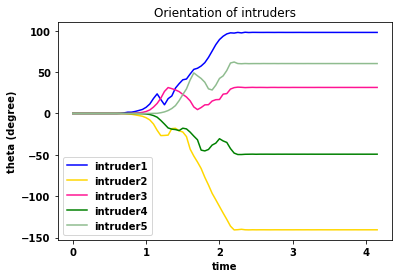

In [17]:
# theta Vs time
# plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_Arr,orientation1,label='intruder1',color='blue')
plt.plot(time_Arr,orientation2,label='intruder2',color='gold')
plt.plot(time_Arr,orientation3,label='intruder3',color='deeppink')
plt.plot(time_Arr,orientation4,label='intruder4',color='green')
plt.plot(time_Arr,orientation5,label='intruder5',color='darkseagreen')
plt.xlabel('time')
plt.ylabel('theta (degree)')
plt.title('Orientation of intruders')
plt.legend()
plt.savefig('orientation.svg',bbox_inches='tight')
plt.show()